In [54]:
import urllib.request
import pandas as pd


In [55]:
# Checkout-Daten über die API beziehen und als CSV-Datei speichern
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7fb1db291be0>)

In [56]:
#In einen DataFrame laden und analysieren
checkouts_df = pd.read_csv(checkout_file)

In [57]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2019,1,1,Dog Diaries #6: Sweetie,Kate Klimo,"Juvenile Fiction, Juvenile Literature","Random House, Inc.",2015
1,Digital,OverDrive,EBOOK,2019,2,1,Delicious,Lori Foster,"Fiction, Literature, Romance, Short Stories","Random House, Inc.",2017
2,Digital,OverDrive,EBOOK,2019,2,2,A Journal of the Plague Year,Daniel Defoe,"Fiction, Literature",ePenguin,2011
3,Digital,OverDrive,EBOOK,2019,3,2,The Cocoa Conspiracy,Andrea Penrose,"Fiction, Mystery","Penguin Group (USA), Inc.",2013
4,Physical,Horizon,VIDEODISC,2019,3,2,India / Pilot Film and TV Productions.,NaN,India Description and travel,"Escapi,",[2003]
...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,AUDIOBOOK,2019,1,1,The Yugo: The Rise and Fall of the Worst Car i...,Jason Vuic,"Business, Nonfiction","Tantor Media, Inc",2012
9996,Physical,Horizon,BOOK,2019,1,1,The hero and the crown / Robin McKinley.,"McKinley, Robin",Fantasy,"Greenwillow Books,",[1985]
9997,Physical,Horizon,BOOK,2019,1,1,The deeds of the disturber / Elizabeth Peters.,"Peters, Elizabeth, 1927-2013","Peabody Amelia Fictitious character Fiction, W...","Harper,",2011.
9998,Digital,OverDrive,AUDIOBOOK,2019,1,2,Bull Mountain (Unabridged),Brian Panowich,"Fiction, Literature","Recorded Books, LLC",2018


In [58]:
checkouts_df.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [59]:
# Drei Abfragen für diese Tabelle
# 1. subjects zählen
# 2. Gesamcheckouts --> checkouts je subject
# 3. subjects anteil physicyl, Anteil diigital

In [7]:
checkouts_df["usageclass"].value_counts()

Physical    5995
Digital     4005
Name: usageclass, dtype: int64

In [60]:
checkouts_df[["usageclass","checkouts","materialtype"]]

,usageclass,checkouts,materialtype
0,Digital,1,EBOOK
1,Digital,1,EBOOK
2,Digital,2,EBOOK
3,Digital,2,EBOOK
4,Physical,2,VIDEODISC
...,...,...,...
9995,Digital,1,AUDIOBOOK
9996,Physical,1,BOOK
9997,Physical,1,BOOK
9998,Digital,2,AUDIOBOOK


In [65]:
checkouts_df[checkouts_df["materialtype"] == "AUDIOBOOK"]


,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
6,Digital,OverDrive,AUDIOBOOK,2019,4,4,The Testament of Mary (Unabridged),Colm Toibin,"Fiction, Literature","Recorded Books, LLC",2015
7,Digital,OverDrive,AUDIOBOOK,2019,4,7,Hippie (Unabridged),Paulo Coelho,"Fiction, Literature",Books on Tape,2018
9,Digital,OverDrive,AUDIOBOOK,2019,4,1,Aquarium (Unabridged),David Vann,"Fiction, Literature","Blackstone Audio, Inc.",2015
27,Digital,OverDrive,AUDIOBOOK,2019,1,1,The Joy of Selling (Unabridged),Steve Chandler,"Business, Nonfiction",HighBridge Company,2007
38,Digital,OverDrive,AUDIOBOOK,2019,1,5,Bleachers (Unabridged),John Grisham,"Fiction, Suspense",Books on Tape,2007
...,...,...,...,...,...,...,...,...,...,...,...
9977,Digital,OverDrive,AUDIOBOOK,2019,1,2,"The Worldly Philosophers: The Lives, Times, an...",Robert L. Heilbroner,"Business, Nonfiction","Blackstone Audio, Inc.",2010
9986,Digital,OverDrive,AUDIOBOOK,2019,1,1,"The Sour Lemon Score: Parker Series, Book 12 (...",Richard Stark,"Fiction, Mystery","Blackstone Audio, Inc.",2012
9991,Digital,OverDrive,AUDIOBOOK,2019,1,1,In-Flight Swedish (Unabridged),Living Language,"Foreign Language Study, Nonfiction",Books on Tape,2006
9995,Digital,OverDrive,AUDIOBOOK,2019,1,1,The Yugo: The Rise and Fall of the Worst Car i...,Jason Vuic,"Business, Nonfiction","Tantor Media, Inc",2012


<AxesSubplot:>

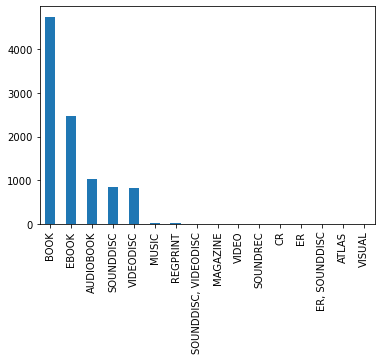

In [69]:
checkouts_df["materialtype"].value_counts().plot(kind="bar")

In [66]:
checkouts_audiobooks_2019_df = checkouts_df[checkouts_df["materialtype"] == "AUDIOBOOK"]

In [87]:
checkouts_audiobooks_2019_df["materialtype"].value_counts()

AUDIOBOOK    1038
Name: materialtype, dtype: int64

<AxesSubplot:>

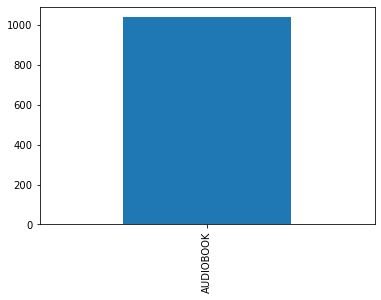

In [84]:
checkouts_audiobooks_2019_df["materialtype"].value_counts().plot(kind="bar")

In [82]:
checkouts_audiobooks_2019_df["checkouts"].sum ().

5086

AttributeError: 'numpy.int64' object has no attribute 'plot'

In [67]:
# Checkout-Daten über die API beziehen und als CSV-Datei speichern
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&$limit=10000"
checkout_file2021 = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file2021)

('checkout.csv', <http.client.HTTPMessage at 0x7fb1daa26a00>)

In [68]:
checkouts_df_2021 = pd.read_csv(checkout_file2021)

In [71]:
checkouts_df_2021

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2021,1,4,Plainsong,Kent Haruf,"Fiction, Literature","Random House, Inc.",2012
1,Digital,OverDrive,EBOOK,2021,1,1,Second Life: A Novel,S. J. Watson,"Fiction, Suspense, Thriller",HarperCollins Publishers Inc.,2015
2,Digital,OverDrive,EBOOK,2021,1,1,"Ethan in Gold: Johnnies Series, Book 3",Amy Lane,"Fiction, Romance",Dreamspinner Press,2014
3,Digital,OverDrive,EBOOK,2021,1,2,Beauchamp Hall: A Novel,Danielle Steel,"Fiction, Romance","Random House, Inc.",2018
4,Digital,OverDrive,AUDIOBOOK,2021,1,2,Shardik (Unabridged),Richard Adams,"Fiction, Literature","Blackstone Audio, Inc.",2017
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2021,1,1,"Future tense : Jews, Judaism, and Israel in th...","Sacks, Jonathan, 1948-2020","Judaism 21st century, Jews Identity, Faith Jud...","Schocken Books,",[2009]
9996,Digital,OverDrive,EBOOK,2021,1,2,Dead But Not Forgotten: Stories from the World...,Charlaine Harris,"Fantasy, Fiction, Romance, Short Stories","Penguin Group (USA), Inc.",2014
9997,Physical,Horizon,BOOK,2021,1,4,Fancy Nancy and the posh puppy / written by Ja...,"O'Connor, Jane","Families Juvenile fiction, Papillon dog Juveni...","Harper,",2012.
9998,Physical,Horizon,VIDEODISC,2021,1,1,Unbroken / Universal ; Legendary ; directed by...,NaN,"Zamperini Louis 1917 2014 Drama, Olympic athle...","Universal,",[2015]


<AxesSubplot:>

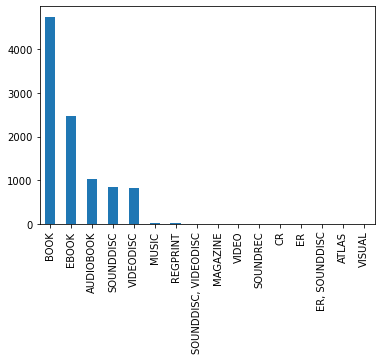

In [73]:
checkouts_df["materialtype"].value_counts().plot(kind="bar")

In [75]:
checkouts_df_2021[checkouts_df_2021["materialtype"] == "AUDIOBOOK"]


,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
4,Digital,OverDrive,AUDIOBOOK,2021,1,2,Shardik (Unabridged),Richard Adams,"Fiction, Literature","Blackstone Audio, Inc.",2017
6,Digital,OverDrive,AUDIOBOOK,2021,1,1,Murder Most Foul Volume 2 (Unabridged),Various,"Fiction, Horror",CSA Word,2008
15,Digital,OverDrive,AUDIOBOOK,2021,1,1,Why Homer Matters (Unabridged),Adam Nicolson,"History, Nonfiction","Tantor Media, Inc",2015
24,Digital,OverDrive,AUDIOBOOK,2021,1,1,True Story (Unabridged),Bill Maher,"Humor (Nonfiction), Nonfiction","Phoenix Books, Inc.",2007
44,Digital,OverDrive,AUDIOBOOK,2021,1,1,Dark Eye (Unabridged),William Bernhardt,"Fiction, Thriller",Books on Tape,2008
...,...,...,...,...,...,...,...,...,...,...,...
9962,Digital,OverDrive,AUDIOBOOK,2021,1,3,Easy Learning Spanish Audio Course – Stage 2: ...,Collins Dictionaries,"Language Arts, Nonfiction",HarperCollins Publishers Ltd.,2009
9969,Digital,OverDrive,AUDIOBOOK,2021,1,1,After the Rains: Beneath a Southern Sky Series...,Deborah Raney,"Fiction, Mystery",Books In Motion,2009
9970,Digital,OverDrive,AUDIOBOOK,2021,1,7,The Shape of Water: Inspector Montalbano Serie...,Andrea Camilleri,"Fiction, Mystery","Blackstone Audio, Inc.",2006
9972,Digital,OverDrive,AUDIOBOOK,2021,1,2,"Booked: Crossover Series, Book 2 (unabridged) ...",Kwame Alexander,"Juvenile Fiction, Juvenile Literature","Recorded Books, LLC",2018


In [76]:
checkouts_audiobooks_2021_df = checkouts_df_2021[checkouts_df_2021["materialtype"] == "AUDIOBOOK"]

<AxesSubplot:>

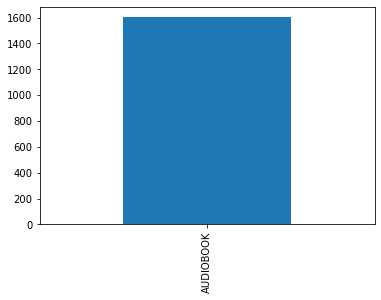

In [80]:
checkouts_audiobooks_2021_df["materialtype"].value_counts().plot(kind="bar")

In [86]:
checkouts_audiobooks_2021_df["materialtype"].value_counts()

AUDIOBOOK    1602
Name: materialtype, dtype: int64

In [81]:
checkouts_audiobooks_2021_df["checkouts"].sum ()

8111

In [ ]:
##  Kann ich 2019 und 2021 auch in einem Histogramm vergleichen? Tabellen zusammenfügen?

In [88]:
pd.concat(objs = [checkouts_audiobooks_2019_df,checkouts_audiobooks_2021_df])

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
6,Digital,OverDrive,AUDIOBOOK,2019,4,4,The Testament of Mary (Unabridged),Colm Toibin,"Fiction, Literature","Recorded Books, LLC",2015
7,Digital,OverDrive,AUDIOBOOK,2019,4,7,Hippie (Unabridged),Paulo Coelho,"Fiction, Literature",Books on Tape,2018
9,Digital,OverDrive,AUDIOBOOK,2019,4,1,Aquarium (Unabridged),David Vann,"Fiction, Literature","Blackstone Audio, Inc.",2015
27,Digital,OverDrive,AUDIOBOOK,2019,1,1,The Joy of Selling (Unabridged),Steve Chandler,"Business, Nonfiction",HighBridge Company,2007
38,Digital,OverDrive,AUDIOBOOK,2019,1,5,Bleachers (Unabridged),John Grisham,"Fiction, Suspense",Books on Tape,2007
...,...,...,...,...,...,...,...,...,...,...,...
9962,Digital,OverDrive,AUDIOBOOK,2021,1,3,Easy Learning Spanish Audio Course – Stage 2: ...,Collins Dictionaries,"Language Arts, Nonfiction",HarperCollins Publishers Ltd.,2009
9969,Digital,OverDrive,AUDIOBOOK,2021,1,1,After the Rains: Beneath a Southern Sky Series...,Deborah Raney,"Fiction, Mystery",Books In Motion,2009
9970,Digital,OverDrive,AUDIOBOOK,2021,1,7,The Shape of Water: Inspector Montalbano Serie...,Andrea Camilleri,"Fiction, Mystery","Blackstone Audio, Inc.",2006
9972,Digital,OverDrive,AUDIOBOOK,2021,1,2,"Booked: Crossover Series, Book 2 (unabridged) ...",Kwame Alexander,"Juvenile Fiction, Juvenile Literature","Recorded Books, LLC",2018


In [89]:
checkouts_audiobooks_2019_2021_df=pd.concat(objs = [checkouts_audiobooks_2019_df,checkouts_audiobooks_2021_df])